<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Détection de fraude à la carte de crédit</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/creditCardFraud-log.jpg" width="96"></th>
 </tr>
<tr>                                                                                   
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/creditCardFraud.png" width="512"></th>
 </tr>    
</table>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp, pickle,re
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

import plotly.express as px
import plotly.graph_objects as go

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

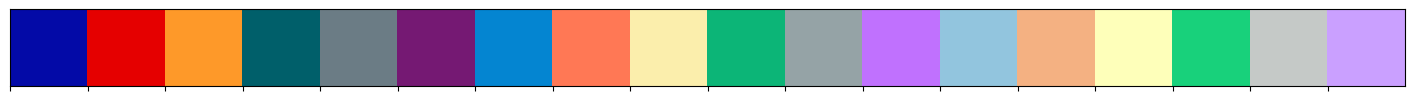

In [4]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [5]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram, affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [6]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee,afficheSeparationsBinaires

In [7]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")
sns.set_style('darkgrid')
sns.set(font_scale=2)

In [8]:
projet = initProjet(repertoireRacine='.',nomProjet='DétectionFraudeCarteCrédit')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

In [97]:
donnees = pd.read_parquet('../donnees/CreditCardFraud/creditCard.parquet',engine='pyarrow').drop(columns=['JourSem','HeureMinute'])
donnees.Amount = np.log(donnees.Amount+1)
cible = 'Class'

In [98]:
donnees.sample(5)

,,,,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Heure24
index,DateOrigine,Time,Class,,,,,,,,,,,,,,,,,,,,,
281464,2013-09-02 23:16:43,170199,0,-0.551225,0.813681,0.312986,-1.044273,1.091791,-0.682278,0.933475,0.112966,-0.375703,-1.163770,...,-0.245717,-0.898986,-0.070311,0.612770,-0.250728,0.052700,0.024815,0.141575,1.091923,23
240881,2013-09-02 17:53:16,150792,0,-0.427480,0.225896,-2.887629,0.034327,0.104595,-0.643798,2.807071,-0.222934,-0.608641,-0.661253,...,0.788767,1.808850,0.926943,0.627929,-0.832747,-0.437181,0.331890,0.374731,6.038444,17
240243,2013-09-02 17:48:27,150503,0,-0.225528,-0.018855,0.189359,-0.050243,0.879075,-1.392628,0.683557,-0.247872,-0.193757,-0.419391,...,-0.090541,-0.414752,0.376895,0.051032,-0.882770,0.137187,0.040812,0.117761,3.931630,17
41606,2013-09-01 11:19:18,40754,0,-0.717177,0.369596,2.272707,1.436434,-0.145656,1.472907,0.205755,0.236097,0.644660,-0.013007,...,-0.324885,-0.353916,-0.010866,-0.307245,-0.324751,-0.466540,-0.197545,-0.073701,3.867862,11
184163,2013-09-02 11:02:05,126121,0,1.917743,-0.335619,-1.709285,0.012335,1.108163,1.402319,-0.249460,0.330267,0.242250,0.189826,...,0.381650,1.298359,-0.013798,-0.858403,0.056411,0.658436,-0.020520,-0.083132,3.122365,11


In [100]:
donnees.reset_index().groupby(cible).Time.count()

Class
0    284314
1       492
Name: Time, dtype: int64

In [101]:
X = donnees.copy()
y = donnees.reset_index()[cible]
y.index = X.index

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonTraitementValidation.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

In [102]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.4, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'

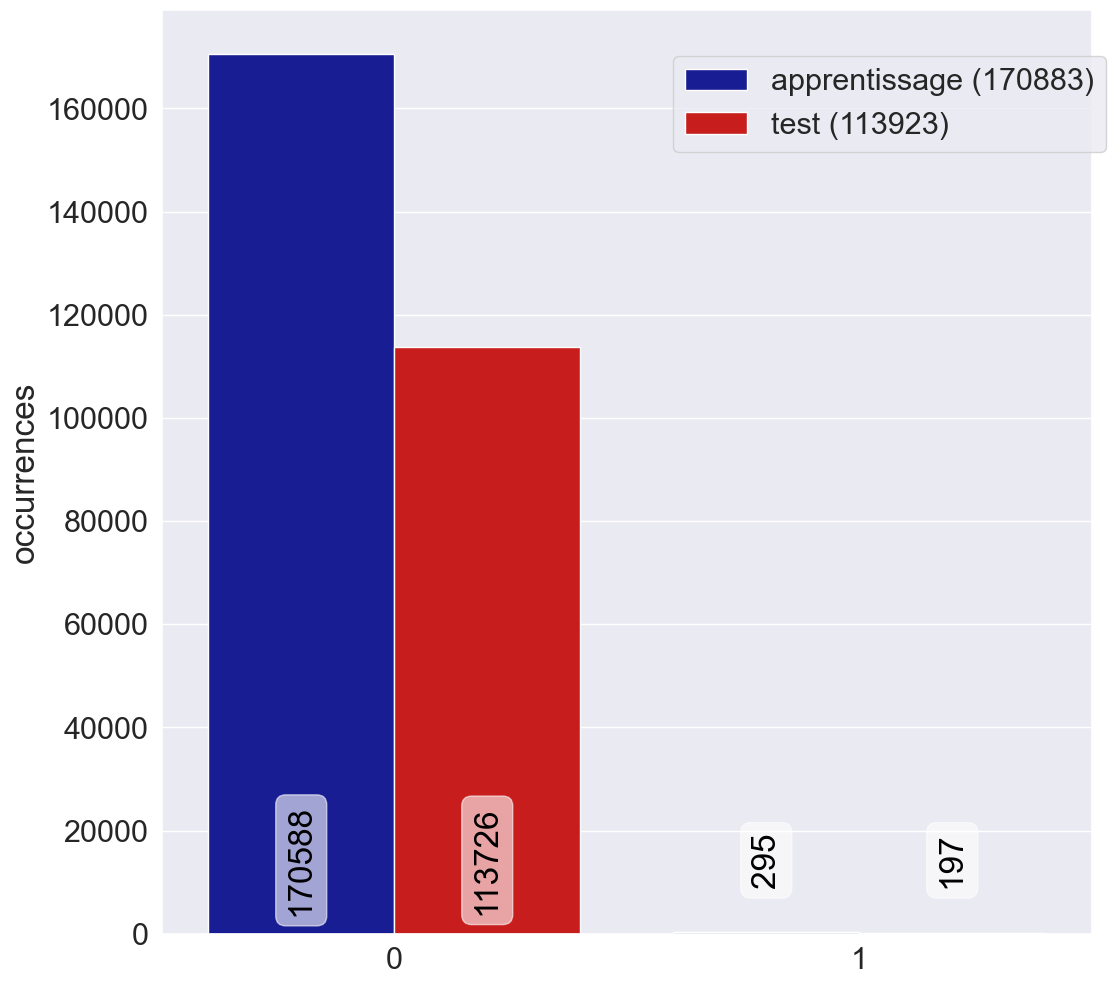

In [103]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
afficheSeparationsBinaires(donnees, palette, ax, cible=cible)

In [104]:
donnees.reset_index().groupby(['échantillon',cible]).V1.count()

échantillon    Class
apprentissage  0        170588
               1           295
test           0        113726
               1           197
Name: V1, dtype: int64

In [105]:
295*100/170883

0.17263273701889598

In [106]:
100 - (295 * 100/ 170588)

99.82706872699134

In [107]:
100 - (197 * 100/ 113726)

99.82677663858749

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classificateurs </div></b>

In [112]:
classificateursDict =  initDictionnaireClassificateurs(arbres=2048)

classificateursDict.pop('AdaBoost'),\
classificateursDict.pop('LightGBM'),\
# classificateursDict.pop('XGBoost'),\
classificateursDict.pop('Stochastic_GD'),\
classificateursDict.pop('Gaussian_Process'),\
classificateursDict.pop('Linear_SVM'),\
classificateursDict.pop('Radial_NuSVM'),\
classificateursDict.pop('Poly_NuSVM'),\
classificateursDict.pop('QuadraticDiscriminant'),\
classificateursDict.pop('Nearest_Neighbors'),\
 classificateursDict.pop('GaussianNaiveBayes')

(SGDClassifier(alpha=0.01, loss='log_loss', max_iter=200),
 GaussianProcessClassifier(n_jobs=-1),
 SVC(C=10, kernel='linear', probability=True),
 NuSVC(gamma=0.5, nu=0.195, probability=True),
 NuSVC(kernel='poly', nu=0.1, probability=True),
 QuadraticDiscriminantAnalysis(),
 KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=17, p=1,
                      weights='distance'),
 GaussianNB())

In [116]:
from sklearn.neural_network import MLPClassifier
classificateursDict['Neural_Net']=MLPClassifier(hidden_layer_sizes=(256,4))

In [118]:
classificateursDict

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=2048, n_jobs=-1),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='auc', feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=2048, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LogisticRegression': LogisticRegression(C=0.81113, max_iter=3000, n_jobs=

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Essai initial avec les donnes sans aucun traitement</div></b> 

LogisticRegression     0.9993	--	Area under the ROC curve : 0.9701	--	Exécution  :3.26s
 0.9994	--	Area under the ROC curve : 0.9529	--	Exécution  :35.22s
 0.9994	--	Area under the ROC curve : 0.9699	--	Exécution  :210.95s
 0.9995	--	Area under the ROC curve : 0.9751	--	Exécution  :19.65s


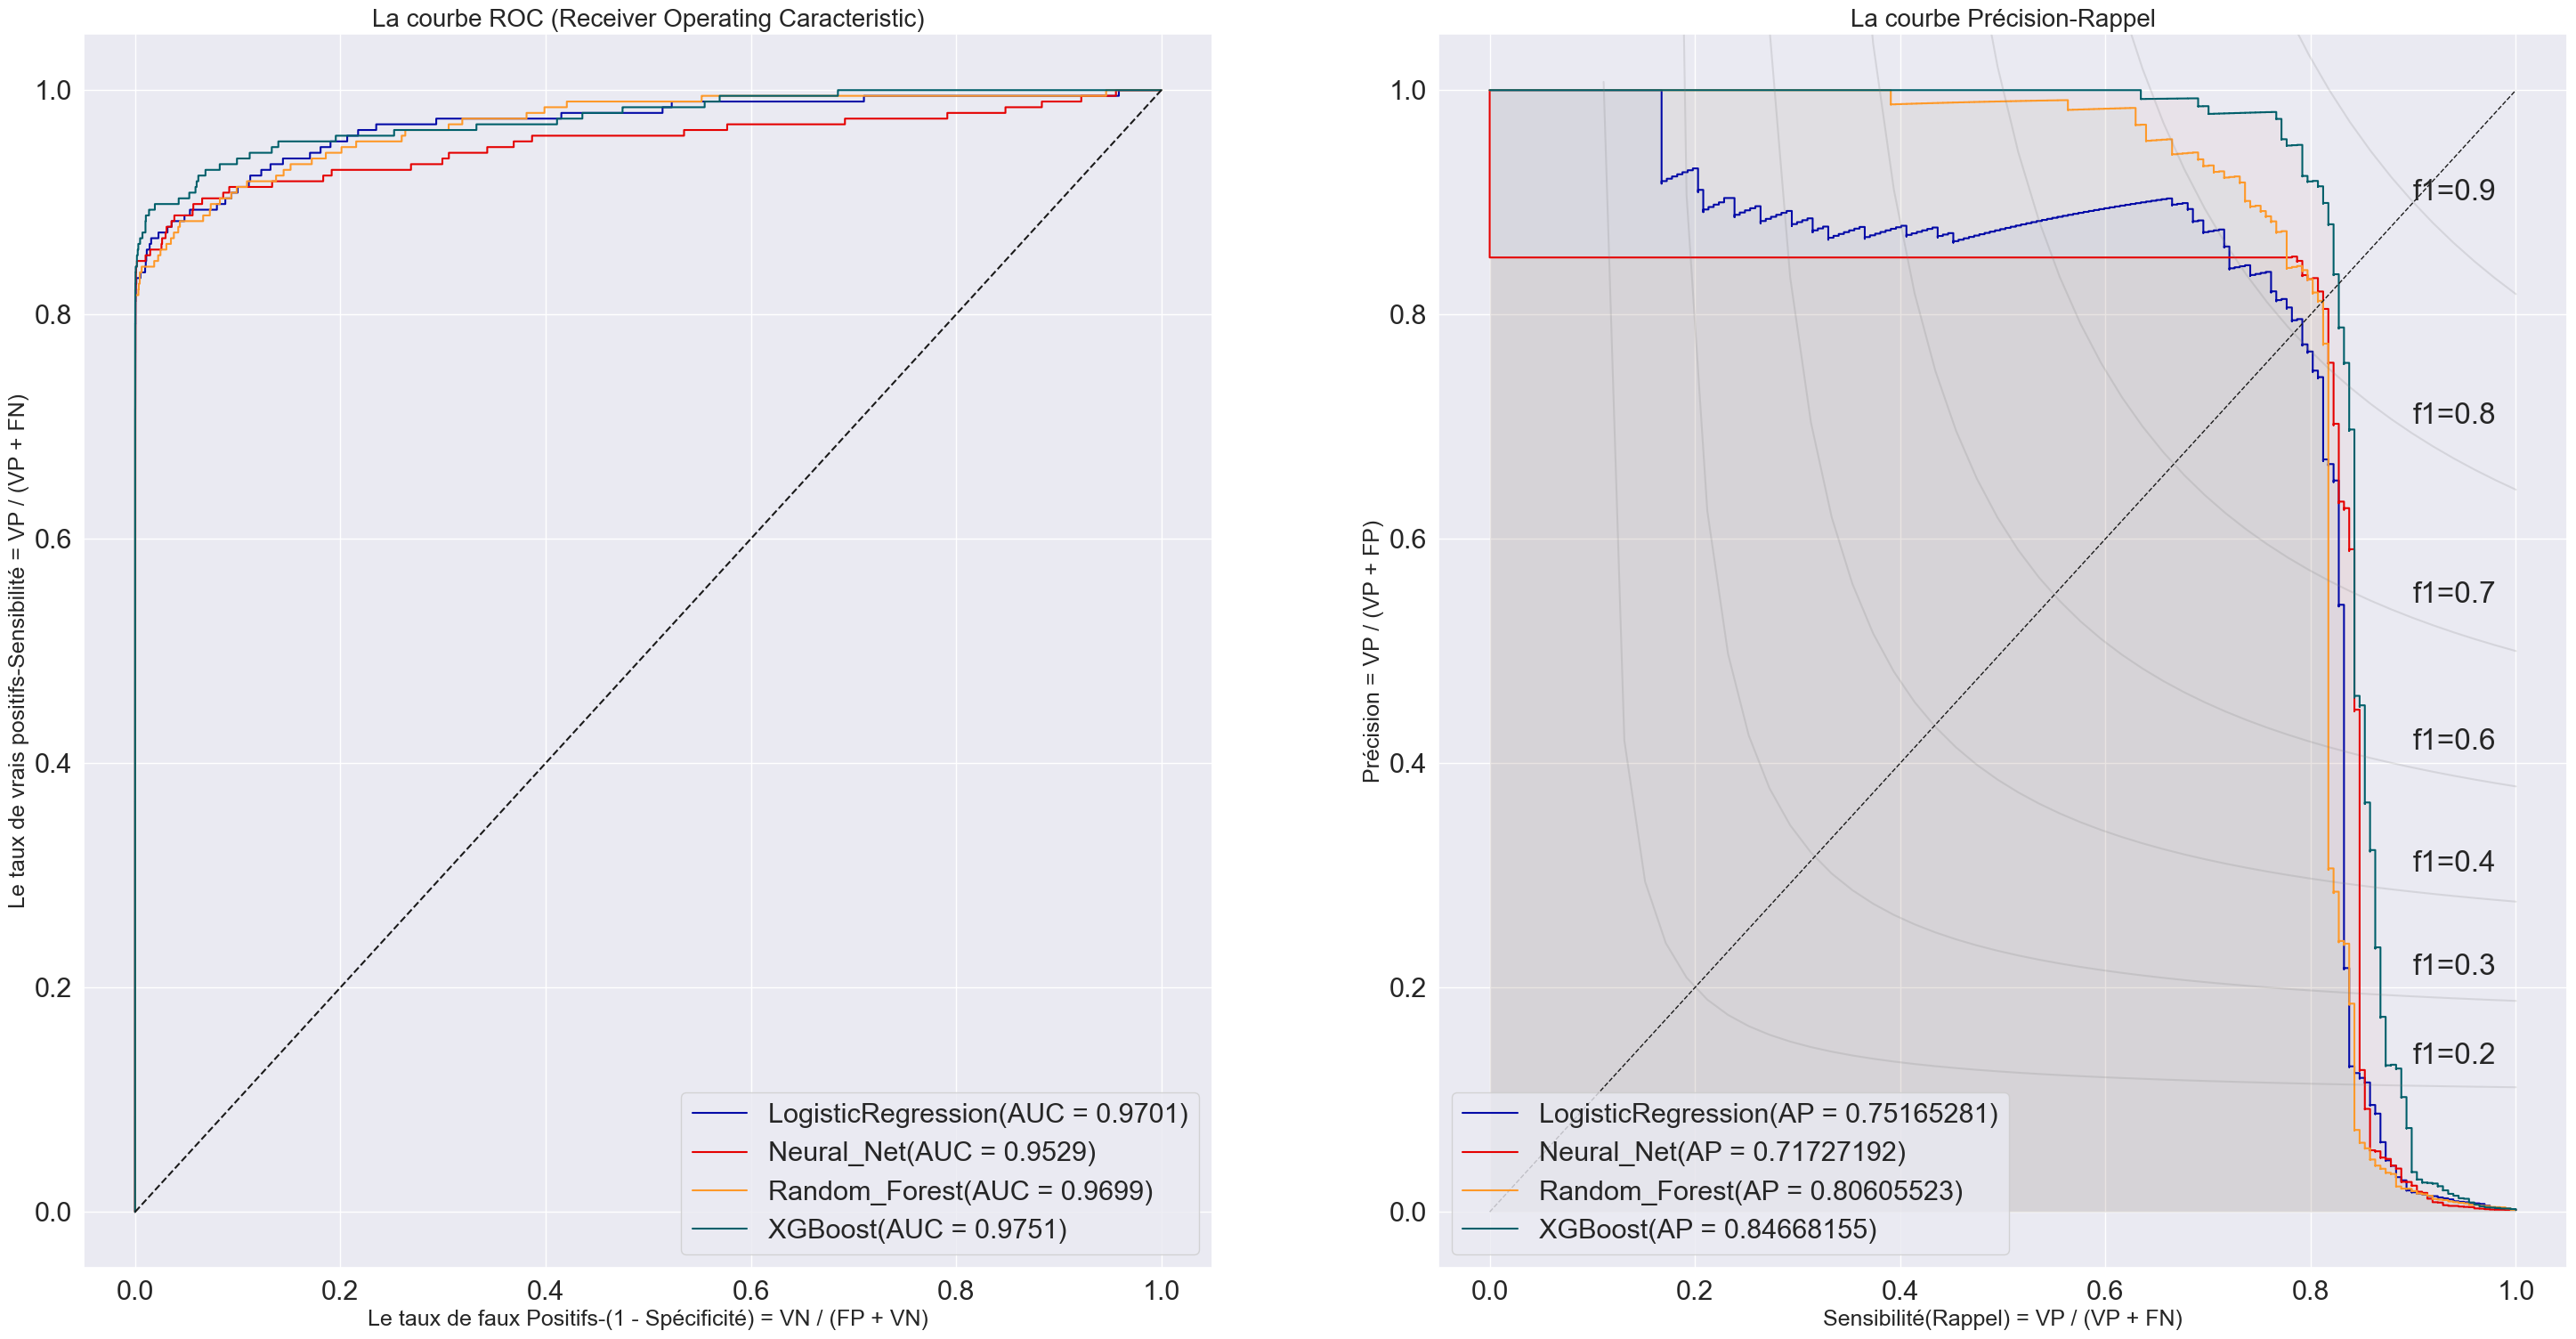

Exécution  :272.64s


In [119]:
resultats = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'Initial', 
                                                     projet=projet)

In [111]:
resultats.drop(columns=['f1', 'precision', 'sensibilite',
       'specificite', 'logloss', 'hammingloss', 'jaccard']).sort_values('aucROC',ascending=False).head(10)

,aucROC,avgPrecRec,accuracy,vrais_positifs,vrais_negatifs,faux_positifs,faux_negatifs,essai
Classifieur,,,,,,,,
Neural_Net,0.977755,0.733701,0.999122,114,113709,17,83,Initial
XGBoost,0.975339,0.847208,0.999544,153,113718,8,44,Initial
LogisticRegression,0.970113,0.751653,0.999289,131,113711,15,66,Initial
Random_Forest,0.969005,0.805944,0.999368,135,113716,10,62,Initial


In [28]:
100 - (197 * 100/ 113726)

99.82677663858749

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Apprentissage et détection des valeurs aberrantes</div></b>

In [120]:
from sklearn.ensemble import IsolationForest

In [121]:
t1=time.time()
modelIF = IsolationForest(contamination='auto',n_estimators=2048, random_state=None, warm_start=True,n_jobs=-1)
modelIF.fit(X_train)
y_pred = modelIF.predict(X_train)
print(f'Execution dans :{(time.time()-t1):.2f}s')  

Execution dans :30.61s


In [122]:
y_pred = pd.Series(y_pred,index=y_train.index)
y_pred = y_pred.apply(lambda x : 0 if x==1 else 1)
pd.crosstab(y_pred,y_train)

Class,0,1
row_0,,
0,164413,47
1,6175,248


In [123]:
y_pred = modelIF.predict(X_test)
y_pred = pd.Series(y_pred,index=y_test.index)
y_pred = y_pred.apply(lambda x : 0 if x==1 else 1)
pd.crosstab(y_pred,y_test)

Class,0,1
row_0,,
0,109578,38
1,4148,159
